# Estudo da correlação entre características socioeconômicas de participantes do ENEM e indicadores de analfabetismo funcional: uma abordagem utilizando técnicas de ciência e mineração de dados

In [ ]:
# !pip install category_encoders

In [27]:
import pandas as pd
import category_encoders as ce

from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATASET_ENEM_PATH = 'D:\Rafael\Projects\IFMG_TCC_ENEM\Datasets\MICRODADOS_ENEM_2021.csv'

In [3]:
usecols = [
    'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
    'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
    'TP_ESCOLA', 'IN_TREINEIRO', 'CO_MUNICIPIO_PROVA', 'NU_NOTA_CN',
    'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
    'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
    'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
    'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
    'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
    'Q023', 'Q024', 'Q025'
]

microdadosEnem = pd.read_csv(DATASET_ENEM_PATH, sep=';', encoding='ISO-8859-1', usecols=usecols)

In [4]:
microdadosEnem.dropna(subset=['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], inplace=True)

In [6]:
microdadosEnem.dropna(subset=[
    'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
    'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
    'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
    'Q023', 'Q024', 'Q025'
], inplace=True)

In [7]:
microdadosEnem.isna().sum().sum()

TP_FAIXA_ETARIA       0
TP_SEXO               0
TP_ESTADO_CIVIL       0
TP_COR_RACA           0
TP_NACIONALIDADE      0
TP_ST_CONCLUSAO       0
TP_ANO_CONCLUIU       0
TP_ESCOLA             0
IN_TREINEIRO          0
CO_MUNICIPIO_PROVA    0
NU_NOTA_CN            0
NU_NOTA_CH            0
NU_NOTA_LC            0
NU_NOTA_MT            0
TP_LINGUA             0
TP_STATUS_REDACAO     0
NU_NOTA_COMP1         0
NU_NOTA_COMP2         0
NU_NOTA_COMP3         0
NU_NOTA_COMP4         0
NU_NOTA_COMP5         0
NU_NOTA_REDACAO       0
Q001                  0
Q002                  0
Q003                  0
Q004                  0
Q005                  0
Q006                  0
Q007                  0
Q008                  0
Q009                  0
Q010                  0
Q011                  0
Q012                  0
Q013                  0
Q014                  0
Q015                  0
Q016                  0
Q017                  0
Q018                  0
Q019                  0
Q020            

#### Aplicação da técnica One-Hot Encoding para tratar variáveis categóricas nominais

In [10]:
oneHotEncoder = OneHotEncoder(cols=['TP_SEXO'])
microdadosEnem = oneHotEncoder.fit_transform(microdadosEnem)
microdadosEnem.head()

,TP_FAIXA_ETARIA,TP_SEXO_1,TP_SEXO_2,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,12,1,0,1,1,1,1,11,1,0,...,A,A,A,B,A,A,C,A,A,A
3,3,1,0,1,3,1,2,0,2,0,...,A,A,A,B,A,A,B,A,B,B
4,2,0,1,1,3,1,2,0,2,0,...,B,A,A,B,A,B,E,A,B,B
8,8,0,1,1,3,1,2,0,2,0,...,B,A,A,B,A,A,B,A,A,B
9,4,0,1,1,3,1,2,0,2,0,...,B,A,B,C,B,A,C,A,A,B


#### Aplicação da técnica Ordinal Encoding para tratar variáveis categóricas ordinais

In [11]:
ordinalEncoder = OrdinalEncoder(cols=[
    'Q001', 'Q002', 'Q003', 'Q004', 'Q006',
    'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
    'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
    'Q023', 'Q024', 'Q025'
])

microdadosEnem = ordinalEncoder.fit_transform(microdadosEnem)
microdadosEnem.head()

,TP_FAIXA_ETARIA,TP_SEXO_1,TP_SEXO_2,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,12,1,0,1,1,1,1,11,1,0,...,1,1,1,1,1,1,1,1,1,1
3,3,1,0,1,3,1,2,0,2,0,...,1,1,1,1,1,1,2,1,2,2
4,2,0,1,1,3,1,2,0,2,0,...,2,1,1,1,1,2,3,1,2,2
8,8,0,1,1,3,1,2,0,2,0,...,2,1,1,1,1,1,2,1,1,2
9,4,0,1,1,3,1,2,0,2,0,...,2,1,2,2,2,1,1,1,1,2


In [12]:
microdadosEnem.columns.values

array(['TP_FAIXA_ETARIA', 'TP_SEXO_1', 'TP_SEXO_2', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO',
       'CO_MUNICIPIO_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025'], dtype=object)

In [13]:
COMP_1_FILTRO_PROPOSTO = 120
COMP_2_FILTRO_PROPOSTO = 80
COMP_3_FILTRO_PROPOSTO = 80
COMP_4_FILTRO_PROPOSTO = 40
COMP_5_FILTRO_PROPOSTO = 40

@TODO:: AVALIAR SE O METODO ABAIXO ESTA CORRETO

In [24]:
filtro = (
    (microdadosEnem['NU_NOTA_COMP1'] <= COMP_1_FILTRO_PROPOSTO) &
    (microdadosEnem['NU_NOTA_COMP2'] <= COMP_2_FILTRO_PROPOSTO) &
    (microdadosEnem['NU_NOTA_COMP3'] <= COMP_3_FILTRO_PROPOSTO) &
    (microdadosEnem['NU_NOTA_COMP4'] <= COMP_4_FILTRO_PROPOSTO) &
    (microdadosEnem['NU_NOTA_COMP5'] <= COMP_5_FILTRO_PROPOSTO)
)

candidatos_filtrados = microdadosEnem[filtro].loc[:, 'NU_NOTA_COMP1':'NU_NOTA_COMP5'].count(axis=1) >= 3
microdadosEnem = microdadosEnem[filtro & candidatos_filtrados]
microdadosEnem = microdadosEnem[microdadosEnem.NU_NOTA_REDACAO > 0]

microdadosEnem.head()

,TP_FAIXA_ETARIA,TP_SEXO_1,TP_SEXO_2,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1495,8,1,0,1,1,1,1,4,1,0,...,2,2,1,1,2,1,5,1,1,2
3432,14,1,0,2,3,1,1,15,1,0,...,2,1,1,1,1,1,2,1,1,2
12076,3,0,1,1,2,1,2,0,2,0,...,1,1,1,1,1,1,2,1,1,1
13657,3,0,1,1,1,1,2,0,2,0,...,1,2,1,1,2,2,2,2,2,2
16320,14,0,1,1,3,1,2,0,2,0,...,1,1,1,1,1,1,2,1,1,1


In [25]:
microdadosEnem.shape

(1111, 48)

In [26]:
print(microdadosEnem[['NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']])

         NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  \
1495              40.0           40.0            0.0           40.0   
3432              40.0           80.0           80.0           40.0   
12076             40.0           40.0           40.0           40.0   
13657             20.0           40.0            0.0           20.0   
16320             40.0           80.0           40.0           40.0   
...                ...            ...            ...            ...   
3139075            0.0           40.0            0.0           20.0   
3167470           40.0           40.0           40.0           40.0   
3250279           60.0           40.0           60.0           40.0   
3296618           40.0           40.0           40.0           20.0   
3302294           40.0           60.0           60.0           40.0   

         NU_NOTA_COMP5  
1495               0.0  
3432               0.0  
12076             40.0  
13657             20.0  
16320              0.0

<Axes: >

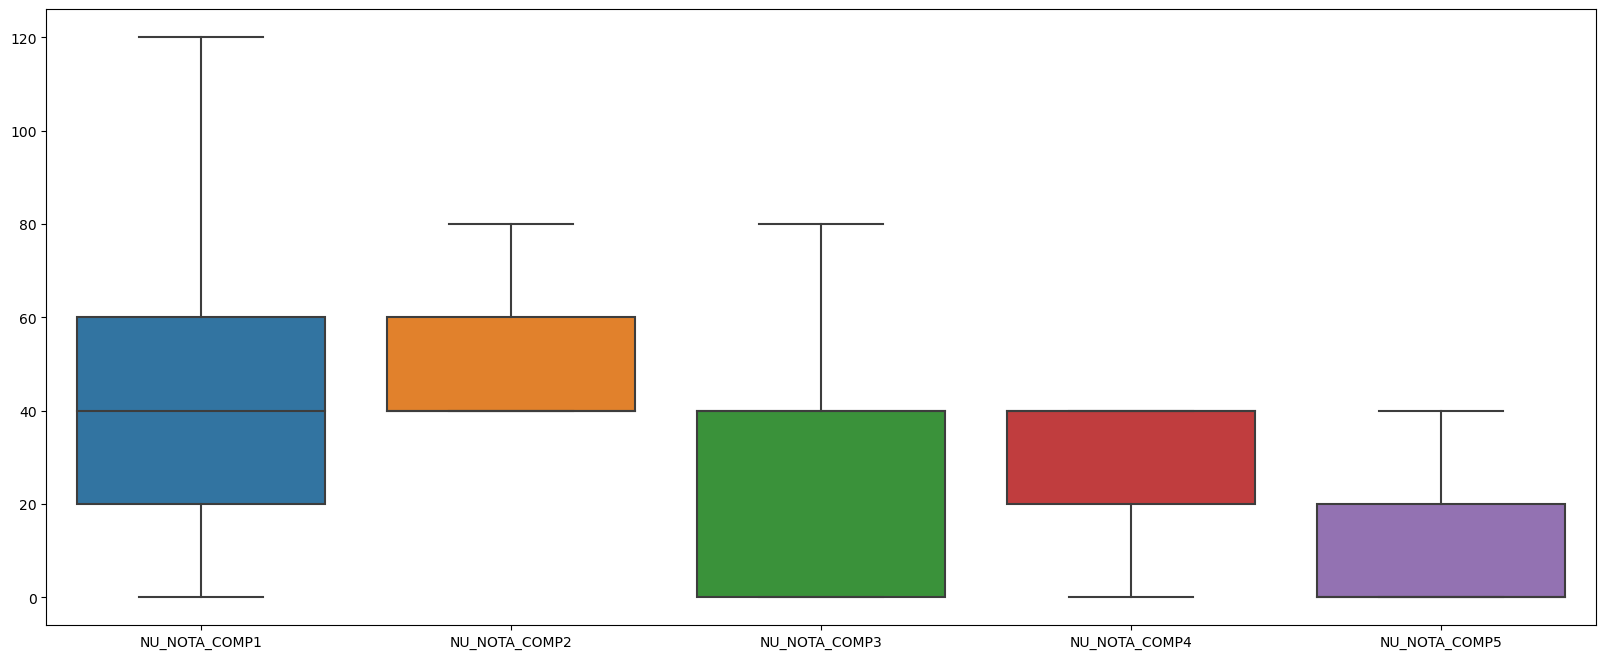

In [30]:
teste = microdadosEnem.melt(microdadosEnem)

plt.figure(figsize=(20,8))
sns.boxplot(data=microdadosEnem[['NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']])